### 딥러닝 모델로 회귀하기: 와인 데이터

#### 데이터 가져오기, 머신러닝 복습

In [65]:
# 로컬 파일에서 데이터 가져오기

import pandas as pd

# CSV 파일 읽기
df = pd.read_csv("../kc_house_data.csv")

print(df.head())  # 데이터 확인

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

In [66]:
# 데이터 train, test 나누기

from sklearn.model_selection import train_test_split  # 데이터 분할 함수
from sklearn.preprocessing import StandardScaler  # 데이터 표준화 함수
import numpy as np

# [데이터 제작]
X = df.drop(columns=["id", "date", "price"]) # id, date는 노이즈이므로 제거
y = df["price"]

# [스케일링]
scaler = StandardScaler() # 표준화(=정규화) 스케일링
X = scaler.fit_transform(X)

#y = y.values.reshape(-1, 1)
#y = scaler.fit_transform(y)

y = np.log1p(df["price"].values) # 로그 변환 스케일링: 레이블 값이 전부 양수일 때 좋음

X.shape, y.shape

((21613, 18), (21613,))

#### 딥러닝 시작

In [67]:
# 원-핫 인코딩, 딥러닝 입력을 위해 Numpy로 변환

# y = pd.get_dummies(y).values # 원-핫 인코딩 코드. 회귀 문제이고, y가 연속적인 숫자값을 가지고 있기 때문에 one-hot 인코딩 없이 바로 사용해야 함.
# y = y.values # Numpy로 변환만
print(y[:5])

# X = X.values # 딥러닝 입력을 위해 Numpy로 변환(but X는 이미 StandardScaler로 인해 Numpy 배열이 되었기 때문에 변환할 필요 없음)
print(X[:5])

[12.30998662 13.1956157  12.10071769 13.31133113 13.14216797]
[[-0.39873715 -1.44746357 -0.97983502 -0.22832133 -0.915427   -0.08717263
  -0.30575946 -0.62918687 -0.55883575 -0.73470764 -0.65868104 -0.54489777
  -0.21012839  1.87015159 -0.35257175 -0.30607896 -0.9433552  -0.26071541]
 [-0.39873715  0.1756067   0.53363434 -0.18988538  0.93650577 -0.08717263
  -0.30575946 -0.62918687 -0.55883575  0.46084084  0.2451414  -0.6810785
   4.7466776   0.87956753  1.16156823 -0.74634143 -0.43268619 -0.18786773]
 [-1.47395936 -1.44746357 -1.42625404 -0.12329847 -0.915427   -0.08717263
  -0.30575946 -0.62918687 -1.40958711 -1.22983377 -0.65868104 -1.29389179
  -0.21012839 -0.9333882   1.28353661 -0.13565477  1.07013975 -0.17237524]
 [ 0.67648506  1.14944885 -0.13055006 -0.2440144  -0.915427   -0.08717263
  -0.30575946  2.44429394 -0.55883575 -0.89169885  1.39751501 -0.20444594
  -0.21012839  1.08516045 -0.28328794 -1.271816   -0.91417411 -0.28452184]
 [-0.39873715 -0.14900736 -0.43542158 -0.169653

In [72]:
# train, test 분리

from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((17290, 18), (17290,), (4323, 18), (4323,))

손실함수

- Binary Crossentropy

이 손실 함수는 이진 분류 문제(binary classification)에 사용됩니다. 여기서 모델은 단 두 개의 클래스 중 하나를 예측해야 합니다. 보통 시그모이드 활성화 함수(sigmoid activation function)를 출력 계층에 사용합니다. 이 함수는 0과 1 사이의 값을 반환하여, 각 클래스에 속할 확률을 나타냅니다.

- Categorical Crossentropy

다중 클래스 분류 문제(multi-class classification)에 사용됩니다. 모델은 두 개 이상의 클래스 중 하나를 예측해야 합니다 소프트맥스 활성화 함수(softmax activation function)가 일반적으로 사용됩니다. 이 함수는 모든 클래스에 대해 확률 분포를 반환하여, 각 클래스에 속할 확률을 나타냅니다.

In [94]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(18,input_shape=(18,),activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(18,activation='relu'))
model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse', 'mae'])
    # mse: 평균 제곱 오차. 오차의 평균의 제곱값.
    # mae: 평균 절대 오차. 오차의 평균의 절댓값.

model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_72 (Dense)                │ (None, 18)             │           342 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ (None, 30)             │           570 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_74 (Dense)                │ (None, 18)             │           558 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_75 (Dense)                │ (None, 1)              │            19 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,489 (5.82 KB)

 Trainable params: 1,489 (5.82 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
N_EPOCHS = 15

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_pred_unscaled = np.expm1(y_pred) # 스케일링한 값 되돌리기
y_test_unscaled = np.expm1(y_test)

# (pred - test)(=예측과 실제값의 차이)의 절댓값(=mae) 출력
mae = np.mean(np.abs(y_test_unscaled.flatten() - y_pred_unscaled.flatten()))
print("\n 스케일링 되돌린 후 mae =", mae)

# 여기서 loss(=mse)값이 너무 크게 나왔을 때 해결방법
# 1. 레이블을 정규화 or log 변환(log scale)(숫자가 작아져 모델 성능 향상도 기대 가능 but 모델 예측 후 되돌려야 함!)
# 2. mse 대신 mae 값을 체크
# 참고. mse는 손실의 '제곱'값이므로 값이 큰 게 정상일 수도 있음

Epoch 1/15
541/541 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 49.1466 - mae: 5.3358 - mse: 49.1466 - val_loss: 1.1786 - val_mae: 0.7997 - val_mse: 1.1786
Epoch 2/15
541/541 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.8391 - mae: 0.6717 - mse: 0.8391 - val_loss: 0.2663 - val_mae: 0.3749 - val_mse: 0.2663
Epoch 3/15
541/541 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2477 - mae: 0.3433 - mse: 0.2477 - val_loss: 0.1317 - val_mae: 0.2582 - val_mse: 0.1317
Epoch 4/15
541/541 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1462 - mae: 0.2668 - mse: 0.1462 - val_loss: 0.1009 - val_mae: 0.2249 - val_mse: 0.1009
Epoch 5/15
541/541 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1100 - mae: 0.2368 - mse: 0.1100 - val_loss: 0.0785 - val_mae: 0.1976 - val_mse: 0.0785
Epoch 6/15
541/541 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0850 - mae: 0.2198 - mse: 0.0850 - val_loss: 0.0642 - val_mae: 0.1879 - val_mse: 0.0642
Epoch 7/15
541/541 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0745 - mae: 0.2052 - mse: 0.0745 - v

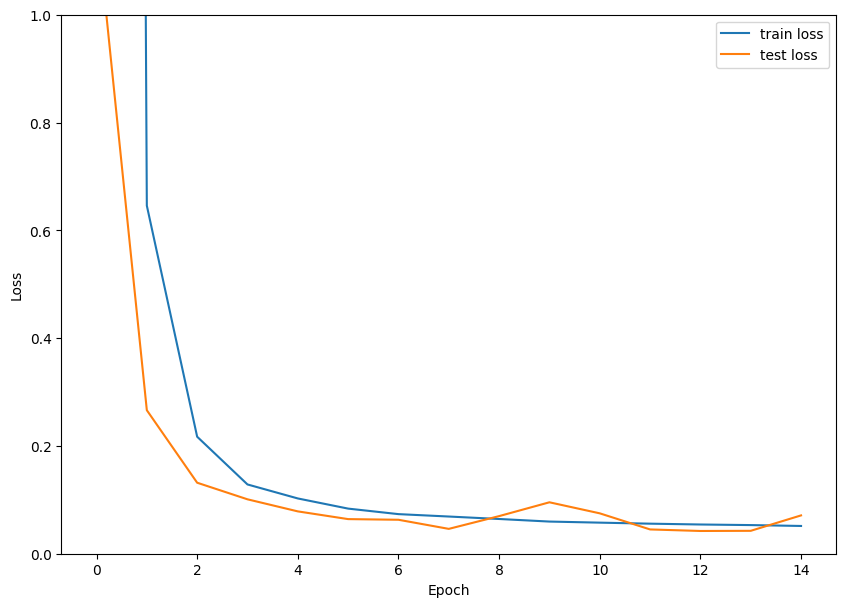

{'loss': [17.646944046020508, 0.6457720398902893, 0.21708892285823822, 0.1285172551870346, 0.10254469513893127, 0.08369698375463486, 0.07346031814813614, 0.06900667399168015, 0.06443561613559723, 0.059659410268068314, 0.05765843391418457, 0.055758289992809296, 0.05422048643231392, 0.053131986409425735, 0.05149541795253754], 'mae': [2.6372992992401123, 0.563669741153717, 0.3186908960342407, 0.25656619668006897, 0.2318907082080841, 0.21750234067440033, 0.20607607066631317, 0.19863653182983398, 0.19285592436790466, 0.18596048653125763, 0.18363626301288605, 0.1803581863641739, 0.1782042682170868, 0.17710410058498383, 0.1732679307460785], 'mse': [17.646944046020508, 0.6457720398902893, 0.21708892285823822, 0.1285172551870346, 0.10254469513893127, 0.08369698375463486, 0.07346031814813614, 0.06900667399168015, 0.06443561613559723, 0.059659410268068314, 0.05765843391418457, 0.055758289992809296, 0.05422048643231392, 0.053131986409425735, 0.05149541795253754], 'val_loss': [1.1785874366760254, 0

In [96]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(0, 1)
plt.legend()
plt.show()

print(history.history)

In [ ]:
# 주어진 데이터(X, y)를 이용해 모델 평가. 모델 작동 후 loss 등 모델 선언 시 지정해 둔 모델 평가 지표를 출력.

model.evaluate(X_test, y_test)

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0734 - mae: 0.2202 - mse: 0.0734


[0.07179323583841324, 0.07179323583841324, 0.21671506762504578]